In [1]:
import numpy as np
import random

In [2]:
# !pip install pyspark

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession\
    .builder\
    .appName("recommender")\
    .getOrCreate()
sc = spark.sparkContext

22/12/11 15:11:15 WARN Utils: Your hostname, noing-Latitude-E5550 resolves to a loopback address: 127.0.1.1; using 192.168.1.16 instead (on interface wlp2s0)
22/12/11 15:11:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/11 15:11:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
data = sc.textFile("ml-100k/u.data")
originRDD = data.map(
  lambda l: l.split('\t')
).map(
  lambda l: (int(l[0]), int(l[1]), float(l[2]))
)


In [4]:
trainRDD, testRDD = originRDD.randomSplit([8,2], 42)

In [5]:
from self_recommender import DSGD, ALS

In [6]:
model = ALS(10, 10, 0.1)
model.train(sc, originRDD, trainRDD, testRDD)

(10, 943)
(10, 1682)


Iteration 0:

RMSE: 1.2210



Iteration 1:

RMSE: 1.2747



Iteration 2:

RMSE: 1.2742



Iteration 3:

RMSE: 1.2660



Iteration 4:

RMSE: 1.2616



Iteration 5:

RMSE: 1.2634



Iteration 6:

RMSE: 1.2690



Iteration 7:

RMSE: 1.2755



Iteration 8:

RMSE: 1.2821



Iteration 9:

RMSE: 1.2893



In [7]:
originRDD.max(lambda x: x[1])

(916, 1682, 3.0)

In [12]:
model.get_test_rmse()

[1.4466817,
 1.0284351,
 0.9283705,
 0.920122,
 0.8874918,
 0.8881697,
 0.879088,
 0.870603,
 0.87083346,
 0.86898845,
 0.8754289]

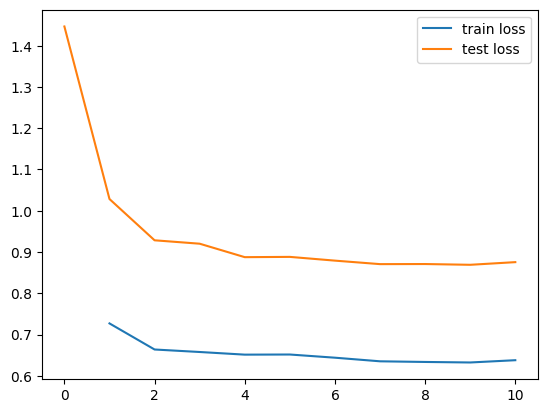

In [11]:
model.plot_rmse()